# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


## Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем библиотеку pandas
import pandas as pd

#импортируемом библиотеку seaborn
import seaborn as sns

#читаем файл
real = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#получаем информацию о столбцах и значениях
real.info()

#выводим первые 5 строк таблицы
real.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0




### Вывод

Файл изучен. Видим большое количество данных разного типа, в том числе пропущенные строки. Для определения параметров, влияющих на цену, необходимо построить графики и изучить их зависимость. 

### Шаг 2. Предобработка данных

In [2]:
#находим количество пропущенных значений в каждом столбце
real.isnull().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод
Пропущенные значения появляются из-за автоматического заполнения некоторых столбцов или из-за того, что некоторые параметры необязательны к заполнению.

In [3]:
#заполняем пропущенные значения #переводим значения столбца 'balcony' в целочисленное
real["balcony"] = real["balcony"].fillna(value=0).astype('int')

#заполняем пропущенные значения
real["floors_total"] = real["floors_total"].fillna(value='')

#заполняем пропущенные значения
real["days_exposition"] = real["days_exposition"].fillna(value='')

#переводим значения столбца 'last_price' в целочисленное
real['last_price'] = real['last_price'].astype('int')

#переводим значения столбца "days_exposition" в целочисленное 
real["days_exposition"] = pd.to_numeric(real["days_exposition"], errors='coerce', downcast='integer')

#заполняем значения столбца 'kitchen_area' медианным значением, сгруппированным по общей площади
real['kitchen_area'].fillna(real.groupby('total_area')['kitchen_area'].transform("median"), inplace=True)

#заполняем значения столбца 'living_area' медианным значением, сгруппированным по общей площади
real['living_area'].fillna(real.groupby('total_area')['living_area'].transform("median"), inplace=True)

#переименование столбцов 
real = real.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#определяем количество пропущенных значений после изменения датафрейма
real.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area               143
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              205
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Комментарии
Оставляем пустые строки в пропущенных значениях в столбцах floors_total — всего этажей в доме, так как нет информации о точном адресе этого дома. 
    Оставляем пустые строки в пропущенных значениях в столбцах days_exposition — сколько дней было размещено объявление (от публикации до снятия), так как нет информации о дате снятия. Переводим в целочисленные значения last_price — цена на момент снятия с публикации, days_exposition — сколько дней было размещено объявление (от публикации до снятия), balcony — число балконов, так как априори эти значения не могут быть дробными. Переводим в целочисленные значения last_price — цена на момент снятия с публикации, так как оперируем большими цифрами. 

In [4]:
# выводим отредактированную таблицу
pd.set_option('display.max_columns',50)
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14,95.0,9,NaN,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



### Шаг 3. Посчитайте и добавьте в таблицу

In [5]:
#рассчитываем цену квадратного метра
#создаем функцию и новый столбец

def price_per_square_meter(row):
    last_price = row['last_price']
    total_area = row['total_area']
    
    price_per_square_meter =last_price / total_area
    return price_per_square_meter

real['price_per_square_meter'] = real.apply(price_per_square_meter, axis=1)
real['price_per_square_meter'] = real['price_per_square_meter'].astype('int')

In [6]:
# посчитали и добавили в таблицу день недели, месяц и год публикации объявления;
# перевели формат даты  
real['first_day_exposition'] = pd.to_datetime(real["first_day_exposition"], format='%Y-%m-%dT%H:%M:%S')
real['day'] = pd.DatetimeIndex(real['first_day_exposition']).weekday
real['month'] = pd.DatetimeIndex(real['first_day_exposition']).month
real['year'] = pd.DatetimeIndex(real['first_day_exposition']).year


In [7]:
#функция для определения категории этажа, как аргумент берет строку,  
#рассматриваем два столбца 'floor' и 'floors_total'
def category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    
    if floor == floors_total:
        return 'последний'
    
    return 'другой'

real['floor_category'] = real.apply(category, axis=1)

real['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

In [8]:
#рассчитываем соотношение жилой и общей площади
#создаем функцию и новый столбец

def ratio_total_living_area(row):
    total_area = row['total_area']
    living_area = row['living_area']
    
    ratio_total_living_area = living_area / total_area
    return ratio_total_living_area
real['ratio_total_living_area'] = real.apply(ratio_total_living_area, axis=1)
real['ratio_total_living_area'] = real['ratio_total_living_area'].round(2)

#рассчитываем соотношение кухни и общей площади
#создаем функцию и новый столбец

def ratio_kitchen_total_area(row):
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    
    ratio_kitchen_total_area = kitchen_area / total_area
    return ratio_kitchen_total_area

real['ratio_kitchen_total_area'] = real.apply(ratio_kitchen_total_area, axis=1)
real['ratio_kitchen_total_area'] = real['ratio_kitchen_total_area'].round(2)
 
#выводим обновленную таблицу    
pd.set_option('display.max_columns',50)
real.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day,month,year,floor_category,ratio_total_living_area,ratio_kitchen_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,NaN,14,95.0,9,NaN,False,False,15.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,0.60,0.09
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.32,0.41


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [9]:
# импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

#характерные значения таблицы
pd.set_option('display.max_columns',50)
real.describe()

,total_images,last_price,total_area,rooms,ceiling_height,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day,month,year,ratio_total_living_area,ratio_kitchen_total_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23556.000000,23699.000000,23494.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23556.000000,23494.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,34.465702,5.892358,10.457529,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,9.942121e+04,2.569307,6.400101,2017.367146,0.565211,0.186718
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,21.834917,4.885249,5.782501,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,5.030681e+04,1.789082,3.491561,1.039771,0.102802,0.071308
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.020000,0.030000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658500e+04,1.000000,3.000000,2017.000000,0.500000,0.140000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.570000,0.170000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,42.300000,8.000000,11.810000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142560e+05,4.000000,10.000000,2018.000000,0.630000,0.230000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.790000


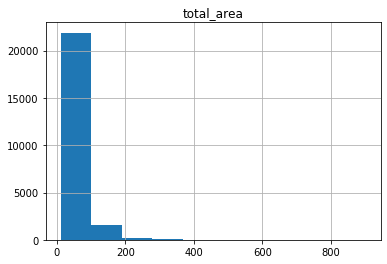

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


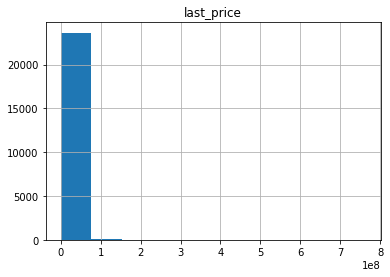

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


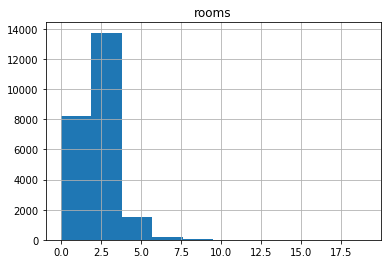

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


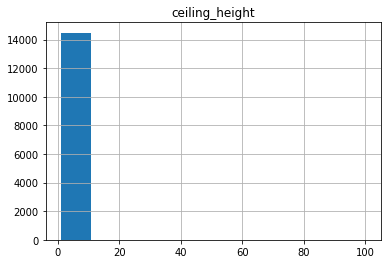

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [10]:
#создали функцию для составления гистограмм и получения характерных значений
for column in ['total_area','last_price', 'rooms', 'ceiling_height']:
    real.hist(column, bins=10)
    plt.show()
    print(real[column].describe())

### Комментарии

Среднее значение площади 60м2, медиана 52м2. так как медиана и среднее близки, то удалять данные по площади не будем.
Среднее и медианное значение числа комнат совпадают. В среднем количество комнат 2, по квартилям от 1 до 3. Редкие значения, например, более 10 не убираем из таблицы. 
Медианное значение высоты потолка 2,65 и среднее значение близки 2,77. Убирать строки не будем, так как можем удалить нужные.
Выбивается только значение цены. Рассмотрим гистограмму цены подробнее.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


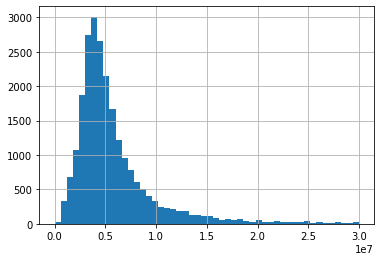

In [11]:
#гистограмма цены
real['last_price'].hist(bins=50, range=(0,30000000))
print(real['last_price'].describe())

(0, 15000000)

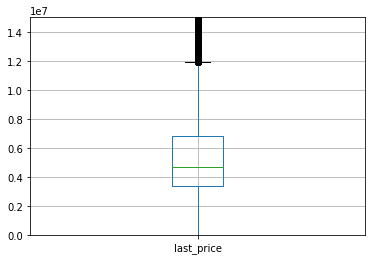

In [12]:
#диаграмма размаха
real[['last_price']].boxplot()
plt.ylim(0, 15000000)


На диаграмме размаха видим длинный ус, начиная от цены в 12 000 000. 
Рассчитаем сколько процентов соствляет цена более 12 000 000 и уберем выбивающиеся значения

In [13]:
#находим процент слишком высоких цен
real['high_price'] = real['last_price'] > 12000000
print(real['high_price'].mean())

0.08190218996582134


Процент выбивающихся значений 8%. Убираем их из датафрейма и заново строим гистограмму.

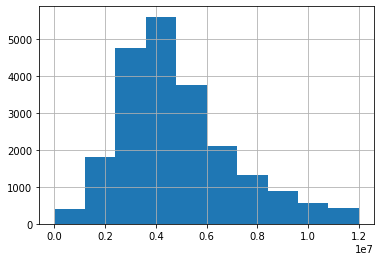

In [14]:
#новый датафрейм без выбивающихся значений
real_filtered = real.query('last_price < 12000000') 
real_filtered['last_price'].hist()

count    19057.000000
mean       173.483654
std        211.935924
min          1.000000
10%         16.000000
25%         44.000000
50%         92.000000
75%        220.000000
90%        440.000000
max       1580.000000
Name: days_exposition, dtype: float64

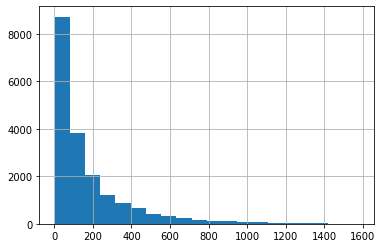

In [15]:
#гистограмма days_exposition — сколько дней было размещено объявление (от публикации до снятия)

real_filtered["days_exposition"].hist(bins=20)

real_filtered["days_exposition"].describe(
percentiles=[0.1,0.25,0.5,0.75,0.9]).T


(0, 600)

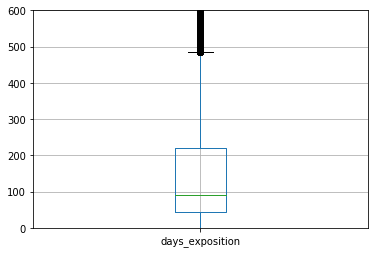

In [16]:
#диаграмма размаха
real_filtered[['days_exposition']].boxplot()
plt.ylim(0, 600)

Срок размещения объявления более 500 выбивается из всей таблицы значений. Убираем его из датафрейма

count    17562.000000
mean       124.326557
std        117.871454
min          1.000000
10%         15.000000
25%         40.000000
50%         80.000000
75%        177.000000
90%        314.000000
max        499.000000
Name: days_exposition, dtype: float64

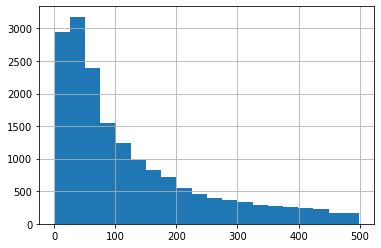

In [17]:
real_filtered = real_filtered.query('days_exposition < 500')
real_filtered["days_exposition"].hist(bins=20)
real_filtered["days_exposition"].describe(
percentiles=[0.1,0.25,0.5,0.75,0.9]).T

# Комментарии
Отфильтровали таблицу, убрали выбивающиеся значения цены и срока размещения объявления.
Продажа считается, прошедшей быстро, если осуществляется менее чем за 15 дней и долгой если более 314 дней. 

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года

In [18]:
real_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17562 entries, 1 to 23695
Data columns (total 30 columns):
total_images                17562 non-null int64
last_price                  17562 non-null int64
total_area                  17562 non-null float64
first_day_exposition        17562 non-null datetime64[ns]
rooms                       17562 non-null int64
ceiling_height              10131 non-null float64
floors_total                17562 non-null object
living_area                 17473 non-null float64
floor                       17562 non-null int64
is_apartment                2042 non-null object
studio                      17562 non-null bool
open_plan                   17562 non-null bool
kitchen_area                17395 non-null float64
balcony                     17562 non-null int64
locality_name               17523 non-null object
airports_nearest            13269 non-null float64
city_centers_nearest        13282 non-null float64
parks_around3000            13282 non

In [19]:
#таблица с выбором определенных столбцов для анализа
real_filtered_stat = real_filtered[['price_per_square_meter','last_price',"total_area", 'rooms','city_centers_nearest','floor_category','day', 'month', 'year']]

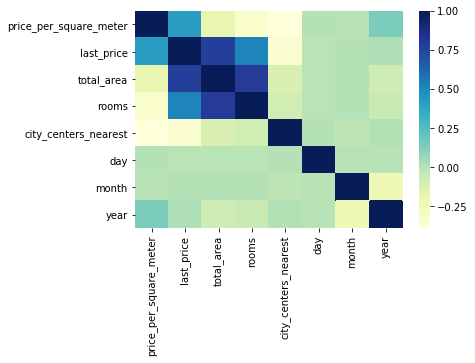

In [20]:
#диаграмма корреляции цены и характеристик
sns.heatmap(real_filtered_stat.dropna().corr(),cmap = "YlGnBu")

Цена коррелирует с общей площадью, количеством комнат и не коррелирует с датой публикации и удаленностью от центра. Интересно,что цена за квадратный метр коррелирует с годом публикации и не коррелирует с расстоянием до центра. 

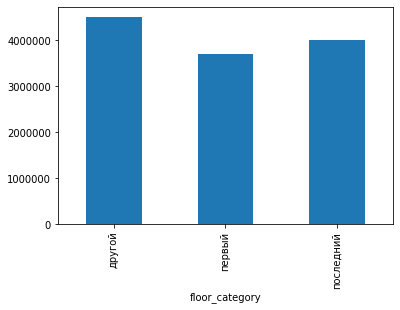

In [21]:
# сгруппировали таблицу по этажам, посчитали медиану и построили график
(real_filtered
     .groupby('floor_category')['last_price'].median()
     .plot(x='floor_category', y='last_price', kind='bar')
)

Зависимость между этажом и ценой есть. Первые этажи дешевле в цене, последние выше по стоимости, но цена квартиры не на первом и не на последнем этажах значительно выше.

Задание: Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [22]:
# находим 10 районов с самым большим количеством объявлений 
a = real_filtered['locality_name'].value_counts().head(10)

# создаем таблицу с этими районами 
top_10_locality = real_filtered.query('locality_name in @a.index')

# группируем таблицу по районам и считаем среднюю цену за квадратный метр
print(top_10_locality.groupby('locality_name')['price_per_square_meter'].mean())
print()

# выводим районы с самой высокой и самой низкой стоимостью жилья
print ('Самая высокая стоимость жилья в городе '+ top_10_locality.groupby('locality_name')['price_per_square_meter'].mean().idxmax())
print ('Самая низкая стоимость жилья в городе '+ top_10_locality.groupby('locality_name')['price_per_square_meter'].mean().idxmin())

locality_name
Всеволожск            66742.557003
Выборг                57010.839378
Гатчина               67974.160494
Колпино               74498.563574
Пушкин                99217.593870
Санкт-Петербург      104342.928064
деревня Кудрово       92585.449057
посёлок Мурино        86069.591753
посёлок Парголово     89185.790941
посёлок Шушары        77938.023377
Name: price_per_square_meter, dtype: float64

Самая высокая стоимость жилья в городе Санкт-Петербург
Самая низкая стоимость жилья в городе Выборг


Задание: Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [23]:
# квартиры только в Санкт-Петербурге
real_SP = real_filtered.query('locality_name == "Санкт-Петербург"').copy()

# создали новый столбец с расстоянием до центра в километрах
real_SP['distance'] = (real_filtered['city_centers_nearest'] / 1000).round()

# посчитали среднюю цену для каждого километра
real_SP.groupby('distance')['price_per_square_meter']


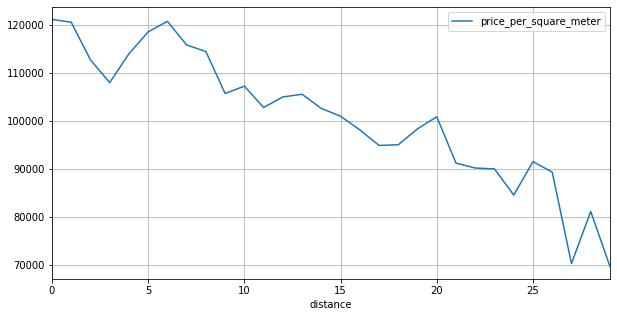

In [24]:
# создали график
(real_SP
     .pivot_table(index='distance', values='price_per_square_meter')
     .plot(grid=True, figsize=(10, 5))
)

Резкое изменение стоимости за квадратный метр приходится после 10 км. Обозначим центральный район в области 10км.

Задание: Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [25]:
# выделили сегмент квартир на расстоянии 10 км от центра
real_SP_center = real_SP.query('distance <= 10')
real_SP_center[['price_per_square_meter','last_price',"total_area", 'rooms', 'ceiling_height']].head(10)

,price_per_square_meter,last_price,total_area,rooms,ceiling_height
4,100000,10000000,100.0,2,3.03
21,101265,3200000,31.6,1,NaN
24,66872,6500000,97.2,2,NaN
56,106097,4350000,41.0,1,2.80
65,77192,4400000,57.0,3,2.50
70,113333,3400000,30.0,1,NaN
85,112311,5200000,46.3,2,3.00
94,118644,3500000,29.5,1,2.50
99,106666,9600000,90.0,4,NaN
103,137142,4800000,35.0,1,2.70


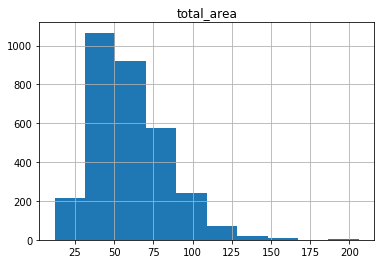

count    3119.000000
mean       60.145239
std        22.955284
min        12.000000
25%        43.005000
50%        56.200000
75%        74.200000
max       206.000000
Name: total_area, dtype: float64


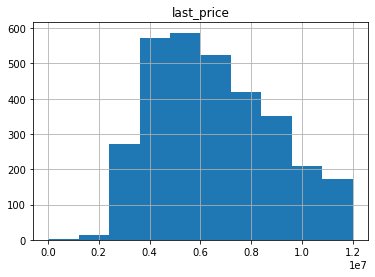

count    3.119000e+03
mean     6.572777e+06
std      2.337613e+06
min      1.219000e+04
25%      4.660000e+06
50%      6.300000e+06
75%      8.250000e+06
max      1.199900e+07
Name: last_price, dtype: float64


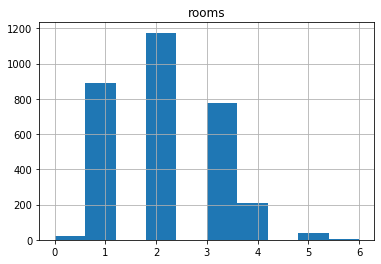

count    3119.000000
mean        2.131773
std         0.982992
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


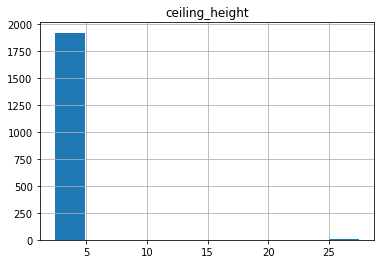

count    1923.000000
mean        2.931175
std         1.103646
min         2.400000
25%         2.600000
50%         2.800000
75%         3.050000
max        27.500000
Name: ceiling_height, dtype: float64


In [26]:
#создали функцию для составления гистограмм и получения характерных значений
for column in ['total_area','last_price', 'rooms', 'ceiling_height']:
    real_SP_center.hist(column, bins=10)
    plt.show()
    print(real_SP_center[column].describe())

In [27]:
# создали таблицу с необходимыми столбцами для сравнения
real_SP_center = real_SP_center[['price_per_square_meter','last_price',"total_area", 'rooms','city_centers_nearest','floor_category','day', 'month', 'year']]

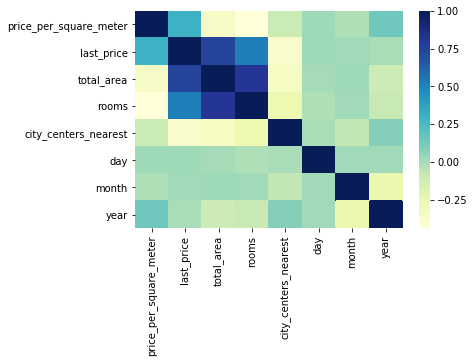

In [28]:
#диаграмма корреляции цены и характеристик
sns.heatmap(real_SP_center.dropna().corr(),cmap = "YlGnBu")

### Шаг 5. Общий вывод

In [29]:
# характерные значения для центрального района Санкт-Петербурга
real_SP_center.describe()


,price_per_square_meter,last_price,total_area,rooms,city_centers_nearest,day,month,year
count,3119.000000,3.119000e+03,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000
mean,112981.858929,6.572777e+06,60.145239,2.131773,6620.120872,2.569413,6.533184,2017.329593
std,27811.738699,2.337613e+06,22.955284,0.982992,2616.590403,1.755475,3.430157,0.873158
min,111.000000,1.219000e+04,12.000000,0.000000,208.000000,0.000000,1.000000,2015.000000
25%,93750.000000,4.660000e+06,43.005000,1.000000,4584.500000,1.000000,3.000000,2017.000000
50%,108064.000000,6.300000e+06,56.200000,2.000000,6653.000000,3.000000,7.000000,2017.000000
75%,128813.500000,8.250000e+06,74.200000,3.000000,9049.000000,4.000000,10.000000,2018.000000
max,312240.000000,1.199900e+07,206.000000,6.000000,10500.000000,6.000000,12.000000,2019.000000


In [30]:
# характерные значения для всех районов
real_filtered_stat.describe()


,price_per_square_meter,last_price,total_area,rooms,city_centers_nearest,day,month,year
count,17562.000000,1.756200e+04,17562.000000,17562.000000,13282.000000,17562.000000,17562.000000,17562.000000
mean,91684.282940,4.756079e+06,52.441856,1.889819,15036.306053,2.591561,6.600843,2017.367783
std,28635.864403,2.160782e+06,18.724790,0.896430,8380.531607,1.790128,3.485846,0.843870
min,111.000000,1.219000e+04,12.000000,0.000000,208.000000,0.000000,1.000000,2015.000000
25%,75000.000000,3.300000e+06,38.400000,1.000000,10754.500000,1.000000,3.000000,2017.000000
50%,92185.500000,4.300000e+06,48.000000,2.000000,13672.000000,3.000000,7.000000,2017.000000
75%,108109.500000,5.850000e+06,62.400000,3.000000,16722.000000,4.000000,10.000000,2018.000000
max,312240.000000,1.199900e+07,230.000000,7.000000,64857.000000,6.000000,12.000000,2019.000000


- Средняя цена (50%) за квадратный метр для всех районов составляет  92185, для Санкт-Петербурга выше - 108064.
- Средняя стоимость квартиры для всех районов - 4 300 000, для Санкт-Петерубурга значительно выше - 6 300 000.
- Средняя площадь для всех районов - 48 м2, для Санкт-Петерубурга значительно - 56,2.
- Количество комнат для всех районов - 2, для Санкт-Петерубурга - тоже 2.

# Вывод

Проведен исследовательский анализ данных о недвижимости в районе Санкт-Петербурга за последние 5 лет.
Стоимость недвижимости зависит от общей площади и соответсвенно от количества комнат, от года публикации. Минимальная площадь квартиры, которая предоставляется на продажу составляет 12м2, средняя цена за квадратный метр составляет 91825 рублей, а в центральном районе Санкт-Петербурга - 108064. В среднем продаются 2-х комнатные квартиры общей площадью 48м2 и высотой потолков 2,6 м. Самые дорогие квартиры в Санкт-Петербурге, а самые дешевые в Выборге, там цена за квадратный метр составляет 57010. Цена за квартиру не на первом и последнем этажах значительно выше. Стоимость квартир на первом этаже - самая низкая. 